In [1]:
import sympy

def sy_baby_f(x1,x2,x3):
    v1 = x1+x2
    v2 = sympy.exp(v1)
    v3 = sympy.sin(v1)
    v4 = x3*x3
    v5 = v2+v3
    v6 = v4*v1
    y1 = v5
    y2 = v6
    return (y1,y2)


In [2]:
import tensorflow as tf

@tf.function
def baby_f(x1, x2, x3):
    print('Baby function')
    v1 = tf.add(x1, x2, name='v1')
    v2 = tf.exp(v1, name='v2')
    v3 = tf.sin(v1, name='v3')
    v4 = tf.multiply(x3, x3, name='v4')
    v5 = tf.add(v2, v3, name='v5')
    v6 = tf.multiply(v4, v1, name='v6')
    y1 = v5
    y2 = v6
    return y1,y2


In [3]:
x1 = tf.Variable(1.0, name='x1')
x2 = tf.Variable(2.0, name='x2')
x3 = tf.Variable(3.0, name='x3')


In [4]:
logdir="tensorboard/gebremedhin_walther"
file_writer = tf.summary.create_file_writer(logdir, max_queue=1)

with file_writer.as_default():
    tf.summary.graph(baby_f.get_concrete_function(x1,x2,x3).graph)


Baby function


In [5]:
with file_writer.as_default():
    tf.summary.graph(baby_f.get_concrete_function(x1,x2,x3).graph)


In [6]:
with tf.GradientTape(persistent=True) as tape:
    f1, f2 = baby_f(x1,x2,x3)


In [7]:
# Possiamo a questo punto stampare i valori del gradiente:
print('=== Automatic derivatives ===')
g = tape.gradient(f1, [x1,x2,x3])
print('𝜕f1/𝜕x1 =', g[0])
print('𝜕f1/𝜕x2 =', g[1])
print('𝜕f1/𝜕x3 =', g[2])
g = tape.gradient(f2, [x1,x2,x3])
print('𝜕f2/𝜕x1 =', g[0])
print('𝜕f2/𝜕x2 =', g[1])
print('𝜕f2/𝜕x3 =', g[2])


=== Automatic derivatives ===
𝜕f1/𝜕x1 = tf.Tensor(19.095545, shape=(), dtype=float32)
𝜕f1/𝜕x2 = tf.Tensor(19.095545, shape=(), dtype=float32)
𝜕f1/𝜕x3 = tf.Tensor(0.0, shape=(), dtype=float32)
𝜕f2/𝜕x1 = tf.Tensor(9.0, shape=(), dtype=float32)
𝜕f2/𝜕x2 = tf.Tensor(9.0, shape=(), dtype=float32)
𝜕f2/𝜕x3 = tf.Tensor(18.0, shape=(), dtype=float32)


In [8]:
print('=== Symbolic derivatives ===')
sy_x1, sy_x2, sy_x3 = sympy.var(['x1', 'x2', 'x3'])
sy_f1, sy_f2 = sy_baby_f(sy_x1, sy_x2, sy_x3)


=== Symbolic derivatives ===


In [9]:
print(sy_f1)

exp(x1 + x2) + sin(x1 + x2)


In [10]:
sy_df1_dx1=sympy.diff(sy_f1,sy_x1)
sy_df1_dx2=sympy.diff(sy_f1,sy_x2)
sy_df1_dx3=sympy.diff(sy_f1,sy_x3)
sy_df2_dx1=sympy.diff(sy_f2,sy_x1)
sy_df2_dx2=sympy.diff(sy_f2,sy_x2)
sy_df2_dx3=sympy.diff(sy_f2,sy_x3)


In [11]:
subs = {sy_x1:1, sy_x2:2, sy_x3:3}

print(f"𝜕f1/𝜕x1 = {sy_df1_dx1} = {sy_df1_dx1.evalf(subs=subs)}")
print(f"𝜕f1/𝜕x2 = {sy_df1_dx2} = {sy_df1_dx2.evalf(subs=subs)}")
print(f"𝜕f1/𝜕x3 = {sy_df1_dx3} = {sy_df1_dx3.evalf(subs=subs)}")
print(f"𝜕f2/𝜕x1 = {sy_df2_dx1} = {sy_df2_dx1.evalf(subs=subs)}")
print(f"𝜕f2/𝜕x2 = {sy_df2_dx2} = {sy_df2_dx2.evalf(subs=subs)}")
print(f"𝜕f2/𝜕x3 = {sy_df2_dx3} = {sy_df2_dx3.evalf(subs=subs)}")


𝜕f1/𝜕x1 = exp(x1 + x2) + cos(x1 + x2) = 19.0955444265872
𝜕f1/𝜕x2 = exp(x1 + x2) + cos(x1 + x2) = 19.0955444265872
𝜕f1/𝜕x3 = 0 = 0
𝜕f2/𝜕x1 = x3**2 = 9.00000000000000
𝜕f2/𝜕x2 = x3**2 = 9.00000000000000
𝜕f2/𝜕x3 = 2*x3*(x1 + x2) = 18.0000000000000


In [12]:
import torch
def baby_torch(x1, x2, x3):
    v1 = torch.add(x1, x2)
    v2 = torch.exp(v1)
    v3 = torch.sin(v1)
    v4 = torch.mul(x3, x3)
    v5 = torch.add(v2, v3)
    v6 = torch.mul(v4, v1)
    y1 = v5
    y2 = v6
    return y1,y2


In [19]:
from torch.autograd import Variable
x1 = Variable(torch.Tensor([1.0]),requires_grad=True)
x2 = Variable(torch.Tensor([2.0]),requires_grad=True)
x3 = Variable(torch.Tensor([3.0]),requires_grad=True)



In [20]:
f1, f2 = baby_torch(x1,x2,x3)


In [21]:
f1.backward()
print(x1.grad)
print(x2.grad)
print(x3.grad)


tensor([19.0955])
tensor([19.0955])
None


In [22]:
if x1.grad:
    x1.grad *= 0
if x2.grad:
    x2.grad *= 0
if x3.grad:
    x3.grad *= 0


In [23]:
f2.backward()
print(x1.grad)
print(x2.grad)
print(x3.grad)


tensor([9.])
tensor([9.])
tensor([18.])


In [24]:
class Baby(torch.nn.Module):
    def __init__(self):
        super().__init__()
        pass

    def forward(self, x):
        return baby_torch(x[0],x[1],x[2])


In [25]:
from torchview import draw_graph
model = Baby()

model_graph = draw_graph(model, input_size=(3,),
                         expand_nested=True,
                         hide_module_functions=False,
                         hide_inner_tensors=False,
                         save_graph=True,
                         device='meta')


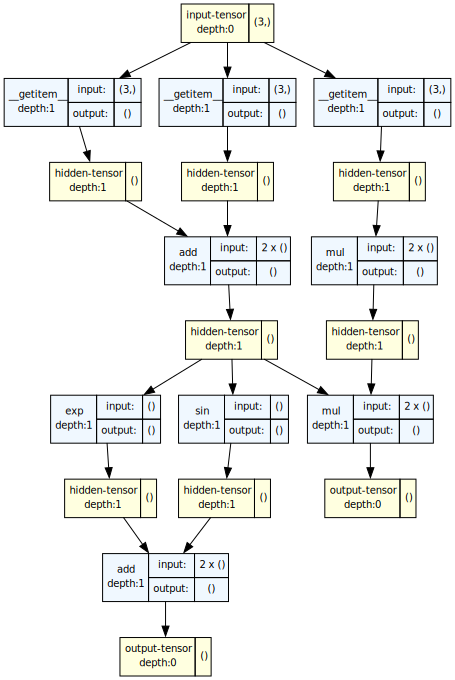

In [26]:
model_graph.visual_graph